<a href="https://colab.research.google.com/github/koushik395/Spark-Foundation-Task-1/blob/main/Task_1(Prediction).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prediction Using Supervised ML
# Predict the Percentage of an student based on the number of study hours



### Import all the necessary Modules


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Read the Data From the CSV file

In [ ]:
url = "http://bit.ly/w-data"
df = pd.read_csv(url)
df.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [ ]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


### Check for Missing values

In [ ]:
df.isna().sum()

Hours     0
Scores    0
dtype: int64

In [ ]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


### Plotting the regression line among the Variables

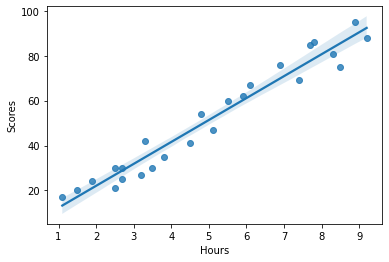

In [ ]:
import seaborn as sns
sns.regplot(x='Hours',y='Scores',data=df)

In [ ]:
x = df.drop(['Scores'],axis = 1)
y = df['Scores']
print(x.shape)
print(y.shape)

(25, 1)
(25,)


In [ ]:
x.head()

,Hours
0,2.5
1,5.1
2,3.2
3,8.5
4,3.5


### Splitting the Data into training and testing Data

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=50)

### Performing Linear Regression on the Data

In [ ]:
from sklearn.linear_model import LinearRegression
#Linear Regression
Linear=LinearRegression()
Linear.fit(X_train,y_train)
y_pred=Linear.predict(X_test)
y_pred

array([88.21139357, 28.71845267, 69.02012231, 39.27365186, 13.36543566])

In [ ]:
new_df = pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
new_df

,Actual,Predicted
15,95,88.211394
20,30,28.718453
23,76,69.020122
22,35,39.273652
14,17,13.365436


### Predicting with user-Given Data


In [ ]:
hours = 9.25
pred_value = Linear.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(pred_value[0]))

No of Hours = 9.25
Predicted Score = 91.56986604454478


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


### Model Performance

In [ ]:
from sklearn.metrics import mean_absolute_error,r2_score
print("R2 score of the model is ",r2_score(y_pred,y_test))
print("mean_absolute_error  of the model is ",mean_absolute_error(y_pred,y_test))

R2 score of the model is  0.9654818128764714
mean_absolute_error  of the model is  4.5916495300630285
